# iris data

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [53]:
X, y = load_iris(return_X_y=True)

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


- 라벨 비율

In [71]:
cnt_train = [0, 0, 0]
cnt_test = [0, 0, 0]

for y in y_train:
    if y == 0:
        cnt_train[0] += 1
    elif y == 1:
        cnt_train[1] += 1
    elif y == 2:
        cnt_train[2] += 1

for y in y_test:
    if y == 0:
        cnt_test[0] += 1
    elif y == 1:
        cnt_test[1] += 1
    elif y == 2:
        cnt_test[2] += 1

In [72]:
print(cnt_train)
print(cnt_train[0]/sum(cnt_train))
print(cnt_train[1]/sum(cnt_train))
print(cnt_train[2]/sum(cnt_train))
print('---------------')
print(cnt_test)
print(cnt_test[0]/sum(cnt_test))
print(cnt_test[1]/sum(cnt_test))
print(cnt_test[2]/sum(cnt_test))

[37, 38, 37]
0.33035714285714285
0.3392857142857143
0.33035714285714285
---------------
[13, 12, 13]
0.34210526315789475
0.3157894736842105
0.34210526315789475


- 함수

In [73]:
import numpy as np

def calc_ratio(data):
    ls_tmp = []
    for i in range(0, len(np.unique(data))):
        cnt = 0
        for d in data:
            if i == d:
                cnt += 1
        ls_tmp.append(cnt/len(data))
    return ls_tmp

In [74]:
print(calc_ratio(y_train))
print(calc_ratio(y_test))

[0.33035714285714285, 0.3392857142857143, 0.33035714285714285]
[0.34210526315789475, 0.3157894736842105, 0.34210526315789475]


# decision tree

1.0
0.8947368421052632


[Text(223.2, 733.86, 'X[2] <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(111.6, 570.78, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(334.79999999999995, 570.78, 'X[3] <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(223.2, 407.70000000000005, 'X[2] <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(111.6, 244.62, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(334.79999999999995, 244.62, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(223.2, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 407.70000000000005, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

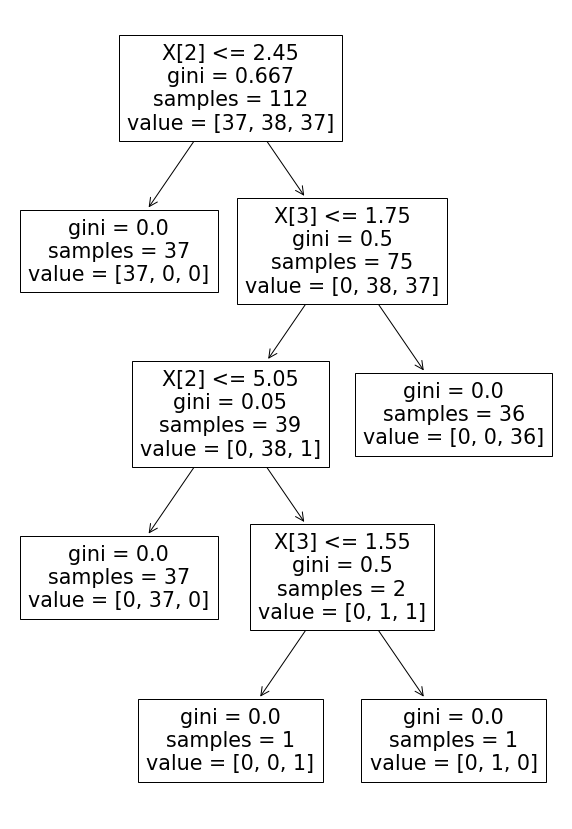

In [85]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

plt.figure(figsize=(10, 15))
tree.plot_tree(clf)

[Text(223.2, 733.86, 'patal length <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]\nclass = Versicolor'),
 Text(111.6, 570.78, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Setosa'),
 Text(334.79999999999995, 570.78, 'patal width <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]\nclass = Versicolor'),
 Text(223.2, 407.70000000000005, 'patal length <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = Versicolor'),
 Text(111.6, 244.62, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Versicolor'),
 Text(334.79999999999995, 244.62, 'patal width <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = Versicolor'),
 Text(223.2, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(446.4, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(446.4, 407.70000000000005, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]\nclass = Virginica')]

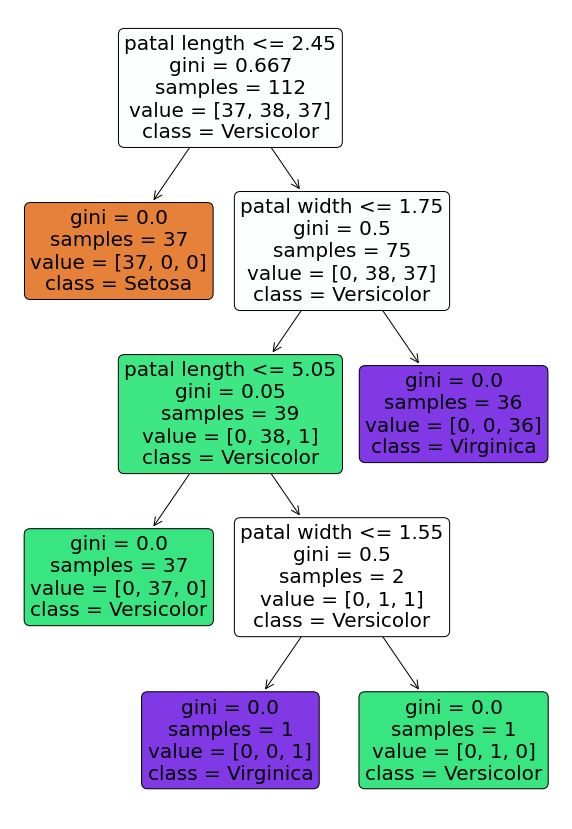

In [100]:
plt.figure(figsize=(10, 15))
tree.plot_tree(clf,
                filled = True,
                rounded = True,
                class_names = ['Setosa', 'Versicolor', 'Virginica'],
                feature_names = ['sepal length', 'sepal width', 'patal length', 'patal width'])

In [86]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.22.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\dojun\anaconda3\envs\python38\lib\site-packages
Requires: numpy, scipy, joblib
Required-by: mlxtend


- clf.score() 없이 직접 정확도 계산

In [87]:
def calc_acc(x, y):
    cnt = 0
    for i, j in zip(clf.predict(x), y):
        if i == j:
            cnt += 1
    return cnt / len(y)

In [89]:
print(calc_acc(X_train, y_train))
print(calc_acc(X_test, y_test))

1.0
0.8947368421052632


# Titanic Decision Tree

In [115]:
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()

display(dfX.tail())
display(dfy.tail())

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


886    0
887    1
888    0
889    1
890    0
Name: survived, dtype: int64

In [118]:
# 0=female, 1=male
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [119]:
# age의 nan값을 평균으로 대체
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [127]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

# pclass 라벨 이진화
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]), columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)

del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


0.8158682634730539
0.7982062780269058


[Text(418.5, 332.955, 'sex <= 0.5\nentropy = 0.962\nsamples = 668\nvalue = [410, 258]\nclass = not survived'),
 Text(209.25, 237.825, 'c3 <= 0.5\nentropy = 0.806\nsamples = 231\nvalue = [57, 174]\nclass = survived'),
 Text(104.625, 142.695, 'age <= 37.0\nentropy = 0.335\nsamples = 129\nvalue = [8, 121]\nclass = survived'),
 Text(52.3125, 47.565, 'entropy = 0.262\nsamples = 90\nvalue = [4, 86]\nclass = survived'),
 Text(156.9375, 47.565, 'entropy = 0.477\nsamples = 39\nvalue = [4, 35]\nclass = survived'),
 Text(313.875, 142.695, 'age <= 38.5\nentropy = 0.999\nsamples = 102\nvalue = [49, 53]\nclass = survived'),
 Text(261.5625, 47.565, 'entropy = 0.99\nsamples = 95\nvalue = [42, 53]\nclass = survived'),
 Text(366.1875, 47.565, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = not survived'),
 Text(627.75, 237.825, 'age <= 14.0\nentropy = 0.706\nsamples = 437\nvalue = [353, 84]\nclass = not survived'),
 Text(523.125, 142.695, 'c3 <= 0.5\nentropy = 0.987\nsamples = 30\nvalue = [13, 17]\

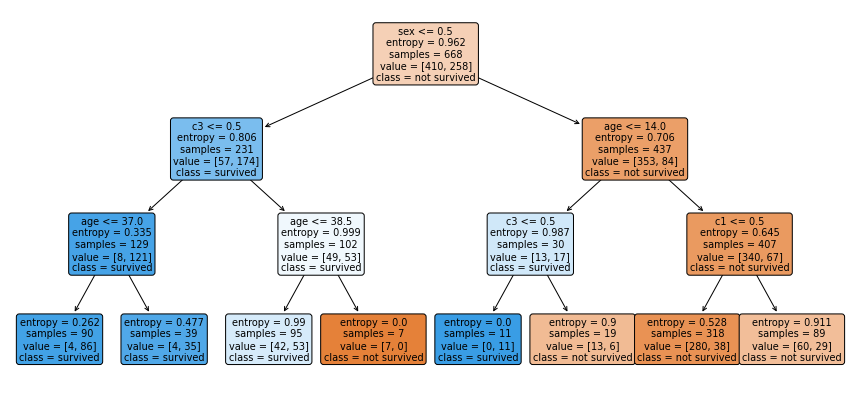

In [143]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# 데이터분리
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

# 모델 학습
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train) 

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

plt.figure(figsize=(15, 7))
tree.plot_tree(model,
                filled = True,
                rounded = True,
                class_names = ['not survived', 'survived'],
                feature_names = ['age', 'sex', 'c1', 'c2', 'c3'])

- 심장병: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning